# Project Capstone - The battle of neighborhoods

## 1. Introduction

New York City is one of the three major centres of the world economy. The city has been described as the cultural, financial, and media capital of the world with significantly impact in terms of commerce, fashion, art, technology, research, enterteinment, tourism and education. Furthermore, is the most diverse and populated city in the United States with an estimated population of over 8.5 million people.  

The city is so large and multifaceted that it can satisfy every interest, every taste. Different visitors come to New York for different purposes. For some, arts and culture is the biggest draw. Others come to New York for its glamour and glitz. Still others come to New York for its architecture, its food and restaurants, its shopping, its late-night vibe, its special events, or simply its great people-watching.  one of the most popular tourist destinations in the world. These are reasons why the city draw hordes of tourists every year and turning it into one of the most popular tourist destinations in the world. 

New York City is definitely one of the most attractive places to start up a new business, and with good reasons!

## 2. Business problem

As mentioned before, there is room for many activities in New York City and gastronomy is one of them. Its cuisine is a reflection of the city multiculturalism, its comprises many cuisines belonging to various ethnic groups that have entered the United States over the time.
And this together with the large influx of people from all over the world makes opening a restaurant a very attractive business.

Finding the right business location is essential for its viability and being able to achieve success in the business. The following are some aspects to consider:
- **Cost of the establishment:** the best locations are the most expensive and, in addition, you have to have the amount of money that the reform can cost.
- **Proximity to demand:** being close to demand and our target is essential for them to reach us. Being close to customers is the best way to get them to choose us.
- **Visible place:** the importance of visibility is such that a business that is difficult to find or that does not stand out, can make a consumer not meet their needs.
- **Communications and ease of access:** this aspect is essential for companies, since if it is difficult to access them, customers can choose other options.
- **Complementary activities:** if there are other types of activities around our company, it can help, and greatly, to increase the number of clients in our business.


## 3. Objective

The objective of this project is to recommend anybody who is looking to open a restaurant which neighborhood in New York City is the best choice to start its business.

## 4. Data

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### 4.1. Neighborhoods in New York City

We will use the dataset downloaded from https://geo.nyu.edu/catalog/nyu_2451_34572 that contains the 5 boroughs and the 306 neighborhoods as well as the the latitude and logitude coordinates of each neighborhood.

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

The next task is essentially transforming this data  into a *pandas* dataframe.

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### 4.2. Geopy Library

We will use geopy library to get the latitude and longitude values of New York City.

In [7]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [8]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### 4.3. Foursquare Location Data

In [9]:
CLIENT_ID = '45GJVWHJWZVWTFZTSZJ5WUQWSJRXLDXM4VQK5CXHFPF40TKL' 
CLIENT_SECRET = 'CBRWRVOHPPJ5WSREERZZTE2OEQEDKUDNRKO3FCQ2JU2SWH4U' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 45GJVWHJWZVWTFZTSZJ5WUQWSJRXLDXM4VQK5CXHFPF40TKL
CLIENT_SECRET:CBRWRVOHPPJ5WSREERZZTE2OEQEDKUDNRKO3FCQ2JU2SWH4U


In [10]:
RADIUS=500
LIMIT=100

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
newyork_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [13]:
newyork_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [14]:
newyork_venues['Venue Category'].unique()

array(['Dessert Shop', 'Pharmacy', 'Ice Cream Shop', 'Donut Shop',
       'Gas Station', 'Caribbean Restaurant', 'Sandwich Place',
       'Laundromat', 'Discount Store', 'Pizza Place', 'Mattress Store',
       'Bagel Shop', 'Grocery Store', 'Fast Food Restaurant',
       'Restaurant', 'Baseball Field', 'Chinese Restaurant',
       'Bus Station', 'Basketball Court', 'Park', 'Optical Shop',
       'Accessories Store', 'Diner', 'Seafood Restaurant',
       'Deli / Bodega', 'Bowling Alley', 'Bus Stop', 'Automotive Shop',
       'Platform', 'Metro Station', 'Convenience Store', 'Juice Bar',
       'Plaza', 'Music Venue', 'River', 'Bank', 'Food Truck',
       'Home Service', 'Gym', 'Playground', 'Gourmet Shop',
       'Latin American Restaurant', 'Pub', 'Beer Bar', 'Burger Joint',
       'Warehouse Store', 'Mexican Restaurant', 'Spanish Restaurant',
       'Coffee Shop', 'Bar', 'Wings Joint', 'Trail', 'Supermarket',
       'Thrift / Vintage Store', 'Bakery', 'Candy Store',
       'Breakfast 

## 5. Exploratory Data Analysis 

We are interested only in restaurants so let's create a dataframe with only venues that have the word **"Restaurant"** in "Venue Category".

In [15]:
newyork_restaurants_venues= newyork_venues[newyork_venues['Venue Category'].str.contains('Restaurant')]
newyork_restaurants_venues.reset_index(drop=True)
newyork_restaurants_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant
16,Co-op City,40.874294,-73.829939,Arby's,40.870411,-73.828606,Fast Food Restaurant
17,Co-op City,40.874294,-73.829939,Townhouse Restaurant,40.876086,-73.828868,Restaurant
19,Co-op City,40.874294,-73.829939,Guang Hui Chinese Restaurant,40.876651,-73.829092,Chinese Restaurant
27,Eastchester,40.887556,-73.827806,Fish & Ting,40.885656,-73.829197,Caribbean Restaurant


In [16]:
newyork_restaurants_venues_Top5 = newyork_restaurants_venues['Venue Category'].value_counts()[0:5].to_frame(name='Frequency')
newyork_restaurants_venues_Top5=newyork_restaurants_venues_Top5.reset_index()

newyork_restaurants_venues_Top5.rename(index=str, columns={'index': 'Category'}, inplace=True)

top5_venues=newyork_restaurants_venues_Top5['Category']

newyork_restaurants_venues_Top5

,Category,Frequency
0,Italian Restaurant,306
1,Chinese Restaurant,215
2,Mexican Restaurant,180
3,American Restaurant,165
4,Sushi Restaurant,107


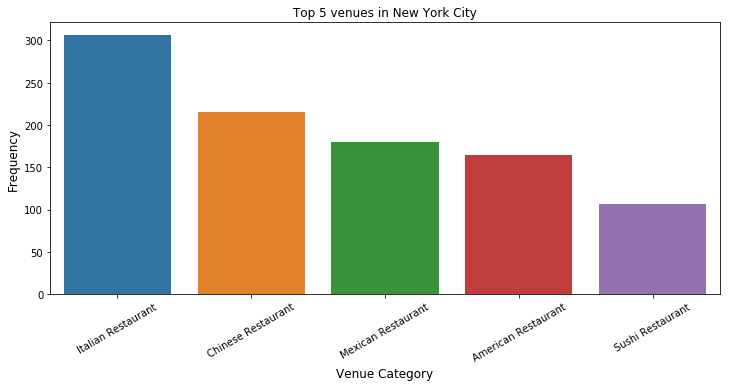

In [17]:
import seaborn as sns
fig = plt.figure(figsize=(12,5))
s=sns.barplot(x="Category", y="Frequency", data=newyork_restaurants_venues_Top5)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Top 5 venues in New York City', fontsize=12)
plt.xlabel("Venue Category", fontsize=12)
plt.ylabel ("Frequency", fontsize=12)
plt.show()

Overall, Italian Restaurant is the most frequent venua we can find in New York City.

#### Now, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [18]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_restaurants_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_restaurants_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,...,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
6,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,Co-op City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,Co-op City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,Co-op City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,Eastchester,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
newyork_onehot.shape

(2507, 91)

In [20]:
neighborhood_groupby = newyork_onehot.groupby('Neighborhood').mean().reset_index()
neighborhood_groupby

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,...,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,Allerton,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Annadale,0.0,0.00,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Arlington,0.0,0.00,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Arrochar,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Arverne,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,Astoria,0.0,0.00,0.025641,0.000000,0.0,0.000000,0.0,0.000000,0.025641,...,0.000000,0.0,0.025641,0.0,0.000000,0.000000,0.0,0.025641,0.000000,0.000000
6,Astoria Heights,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,Auburndale,0.0,0.00,0.166667,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,Bath Beach,0.0,0.00,0.000000,0.000000,0.0,0.058824,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.058824,0.0,0.000000,0.000000,0.000000
9,Battery Park City,0.0,0.00,0.166667,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [21]:
neighborhood_groupby.shape

(262, 91)

In [22]:
num_top_venues = 5

for hood in neighborhood_groupby['Neighborhood']:
    print("----"+hood+"----")
    temp = neighborhood_groupby[neighborhood_groupby['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                     venue  freq
0       Chinese Restaurant  0.50
1     Fast Food Restaurant  0.25
2       Spanish Restaurant  0.25
3        Afghan Restaurant  0.00
4  Scandinavian Restaurant  0.00


----Annadale----
                     venue  freq
0      American Restaurant   0.5
1               Restaurant   0.5
2        Afghan Restaurant   0.0
3  North Indian Restaurant   0.0
4       Russian Restaurant   0.0


----Arlington----
                     venue  freq
0      American Restaurant   1.0
1        Afghan Restaurant   0.0
2  North Indian Restaurant   0.0
3       Russian Restaurant   0.0
4      Romanian Restaurant   0.0


----Arrochar----
                       venue  freq
0         Italian Restaurant   0.4
1   Mediterranean Restaurant   0.2
2  Middle Eastern Restaurant   0.2
3          Polish Restaurant   0.2
4          Afghan Restaurant   0.0


----Arverne----
                     venue  freq
0          Thai Restaurant   1.0
1        Afghan Restaurant   0.0
2  N

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighborhood_groupby['Neighborhood']

for ind in np.arange(neighborhood_groupby.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighborhood_groupby.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Chinese Restaurant,Fast Food Restaurant,Spanish Restaurant,Yemeni Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
1,Annadale,Restaurant,American Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
2,Arlington,American Restaurant,Yemeni Restaurant,Greek Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
3,Arrochar,Italian Restaurant,Polish Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Yemeni Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
4,Arverne,Thai Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


#### Next,  let's group rows by category and by taking the mean of the frequency of occurrence of each neighborhood

In [26]:
top5_categories=newyork_restaurants_venues[newyork_restaurants_venues['Venue Category'].isin(top5_venues)]

categories_onehot = pd.get_dummies(top5_categories[['Neighborhood']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
categories_onehot['Venue Category'] = top5_categories['Venue Category'] 

# move neighborhood column to the first column
fixed_columns = [categories_onehot.columns[-1]] + list(categories_onehot.columns[:-1])
categories_onehot = categories_onehot[fixed_columns]

categories_onehot.head()

,Venue Category,Allerton,Annadale,Arlington,Arrochar,Astoria,Astoria Heights,Auburndale,Bath Beach,Battery Park City,...,West Village,Westchester Square,Westerleigh,Williamsburg,Willowbrook,Windsor Terrace,Woodlawn,Woodrow,Woodside,Yorkville
19,Chinese Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,Chinese Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,Mexican Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,Mexican Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,Mexican Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
categories_groupby = categories_onehot.groupby('Venue Category').mean().reset_index()
categories_groupby

,Venue Category,Allerton,Annadale,Arlington,Arrochar,Astoria,Astoria Heights,Auburndale,Bath Beach,Battery Park City,...,West Village,Westchester Square,Westerleigh,Williamsburg,Willowbrook,Windsor Terrace,Woodlawn,Woodrow,Woodside,Yorkville
0,American Restaurant,0.000000,0.006061,0.006061,0.000000,0.006061,0.000000,0.006061,0.000000,0.006061,...,0.030303,0.000000,0.000000,0.000000,0.000000,0.006061,0.000000,0.000000,0.018182,0.000000
1,Chinese Restaurant,0.009302,0.000000,0.000000,0.000000,0.004651,0.004651,0.000000,0.013953,0.004651,...,0.004651,0.000000,0.000000,0.000000,0.004651,0.004651,0.000000,0.004651,0.009302,0.009302
2,Italian Restaurant,0.000000,0.000000,0.000000,0.006536,0.006536,0.003268,0.006536,0.006536,0.006536,...,0.029412,0.000000,0.000000,0.003268,0.000000,0.003268,0.003268,0.003268,0.000000,0.026144
3,Mexican Restaurant,0.000000,0.000000,0.000000,0.000000,0.005556,0.000000,0.000000,0.000000,0.011111,...,0.000000,0.005556,0.000000,0.000000,0.000000,0.000000,0.000000,0.005556,0.000000,0.016667
4,Sushi Restaurant,0.000000,0.000000,0.000000,0.000000,0.009346,0.000000,0.009346,0.018692,0.000000,...,0.000000,0.000000,0.009346,0.000000,0.000000,0.009346,0.000000,0.009346,0.000000,0.028037


In [28]:
num_top_venues = 5

for cat in categories_groupby['Venue Category']:
    print("----"+cat+"----")
    temp = categories_groupby[categories_groupby['Venue Category'] == cat].T.reset_index()
    temp.columns = ['category','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----American Restaurant----
       category  freq
0  West Village  0.03
1  Hudson Yards  0.02
2    North Side  0.02
3     Chinatown  0.02
4      Red Hook  0.02


----Chinese Restaurant----
            category  freq
0          Chinatown  0.04
1       Little Italy  0.02
2        Kew Gardens  0.02
3        Little Neck  0.02
4  Greenwich Village  0.01


----Italian Restaurant----
            category  freq
0            Belmont  0.06
1    Carroll Gardens  0.04
2          Yorkville  0.03
3  Greenwich Village  0.03
4       West Village  0.03


----Mexican Restaurant----
           category  freq
0          Bushwick  0.03
1  Prospect Heights  0.03
2       East Harlem  0.03
3          Elmhurst  0.02
4        Tudor City  0.02


----Sushi Restaurant----
      category  freq
0   Lenox Hill  0.05
1  Eltingville  0.04
2  Murray Hill  0.04
3   Turtle Bay  0.03
4   Greenpoint  0.03




In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Venue Category']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Neighborhood'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Neighborhood'.format(ind+1))

# create a new dataframe
categories_venues_sorted = pd.DataFrame(columns=columns)
categories_venues_sorted['Venue Category'] = categories_groupby['Venue Category']

for ind in np.arange(categories_groupby.shape[0]):
    categories_venues_sorted.iloc[ind, 1:] = return_most_common_venues(categories_groupby.iloc[ind, :], num_top_venues)

categories_venues_sorted

,Venue Category,1st Most Common Neighborhood,2nd Most Common Neighborhood,3rd Most Common Neighborhood,4th Most Common Neighborhood,5th Most Common Neighborhood
0,American Restaurant,West Village,South Side,Fulton Ferry,Chelsea,Gramercy
1,Chinese Restaurant,Chinatown,Little Italy,Kew Gardens,Little Neck,Clinton Hill
2,Italian Restaurant,Belmont,Carroll Gardens,Greenwich Village,West Village,Yorkville
3,Mexican Restaurant,East Harlem,Bushwick,Prospect Heights,Tudor City,Inwood
4,Sushi Restaurant,Lenox Hill,Murray Hill,Eltingville,Yorkville,Greenpoint


## 5. Clustering Neighborhoods using K-Means

In [69]:
kclusters = 3

newyork_clustering = neighborhood_groupby.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 2], dtype=int32)

In [70]:
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
newyork_merged = neighborhoods
newyork_merged = newyork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
newyork_merged = newyork_merged.dropna()
newyork_merged.reset_index(drop=True)

newyork_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,1.0,Caribbean Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
1,Bronx,Co-op City,40.874294,-73.829939,0.0,Restaurant,Chinese Restaurant,Fast Food Restaurant,Yemeni Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,1.0,Caribbean Restaurant,Seafood Restaurant,Fast Food Restaurant,Chinese Restaurant,Yemeni Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
5,Bronx,Kingsbridge,40.881687,-73.902818,0.0,Mexican Restaurant,Spanish Restaurant,Latin American Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Caribbean Restaurant,Yemeni Restaurant,English Restaurant
6,Manhattan,Marble Hill,40.876551,-73.910660,0.0,Seafood Restaurant,American Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighborhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Let's examine each cluster.

#### Cluster 1

In [72]:
newyork_merged.loc[newyork_merged['Cluster Labels'] == 0]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bronx,Co-op City,40.874294,-73.829939,0.0,Restaurant,Chinese Restaurant,Fast Food Restaurant,Yemeni Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
5,Bronx,Kingsbridge,40.881687,-73.902818,0.0,Mexican Restaurant,Spanish Restaurant,Latin American Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Caribbean Restaurant,Yemeni Restaurant,English Restaurant
6,Manhattan,Marble Hill,40.876551,-73.910660,0.0,Seafood Restaurant,American Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
8,Bronx,Norwood,40.877224,-73.879391,0.0,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,Spanish Restaurant,Caribbean Restaurant,Restaurant,Yemeni Restaurant,French Restaurant,Empanada Restaurant,English Restaurant
10,Bronx,Baychester,40.866858,-73.835798,0.0,Fast Food Restaurant,Mexican Restaurant,Spanish Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
12,Bronx,City Island,40.847247,-73.786488,0.0,Seafood Restaurant,American Restaurant,Italian Restaurant,Spanish Restaurant,French Restaurant,Yemeni Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
13,Bronx,Bedford Park,40.870185,-73.885512,0.0,Mexican Restaurant,Chinese Restaurant,Spanish Restaurant,Yemeni Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
14,Bronx,University Heights,40.855727,-73.910416,0.0,African Restaurant,Latin American Restaurant,Fast Food Restaurant,Chinese Restaurant,Yemeni Restaurant,Gluten-free Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant
15,Bronx,Morris Heights,40.847898,-73.919672,0.0,Spanish Restaurant,Yemeni Restaurant,German Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
16,Bronx,Fordham,40.860997,-73.896427,0.0,Fast Food Restaurant,Spanish Restaurant,Latin American Restaurant,Restaurant,Chinese Restaurant,African Restaurant,Italian Restaurant,Mexican Restaurant,Greek Restaurant,Caribbean Restaurant


In [75]:
newyork_merged.loc[newyork_merged['Cluster Labels'] == 1]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,1.0,Caribbean Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,1.0,Caribbean Restaurant,Seafood Restaurant,Fast Food Restaurant,Chinese Restaurant,Yemeni Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
9,Bronx,Williamsbridge,40.881039,-73.857446,1.0,Caribbean Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
32,Bronx,Van Nest,40.843608,-73.866299,1.0,Yemeni Restaurant,Middle Eastern Restaurant,Caribbean Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
41,Bronx,Olinville,40.871371,-73.863324,1.0,Caribbean Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
56,Brooklyn,East Flatbush,40.641718,-73.936103,1.0,Fast Food Restaurant,Chinese Restaurant,Caribbean Restaurant,Yemeni Restaurant,Gluten-free Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant
72,Brooklyn,East New York,40.669926,-73.880699,1.0,Fast Food Restaurant,Chinese Restaurant,Caribbean Restaurant,Yemeni Restaurant,Gluten-free Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant
73,Brooklyn,Starrett City,40.647589,-73.879370,1.0,American Restaurant,Chinese Restaurant,Caribbean Restaurant,Yemeni Restaurant,Gluten-free Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
74,Brooklyn,Canarsie,40.635564,-73.902093,1.0,Asian Restaurant,Chinese Restaurant,Caribbean Restaurant,Yemeni Restaurant,Gluten-free Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
75,Brooklyn,Flatlands,40.630446,-73.929113,1.0,Fast Food Restaurant,Caribbean Restaurant,Seafood Restaurant,Yemeni Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant


In [74]:
newyork_merged.loc[newyork_merged['Cluster Labels'] == 2]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Bronx,Woodlawn,40.898273,-73.867315,2.0,Italian Restaurant,Indian Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
11,Bronx,Pelham Parkway,40.857413,-73.854756,2.0,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Chinese Restaurant,Yemeni Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
28,Bronx,Throgs Neck,40.815109,-73.816350,2.0,American Restaurant,Italian Restaurant,Asian Restaurant,Yemeni Restaurant,Greek Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
33,Bronx,Morris Park,40.847549,-73.850402,2.0,Arepa Restaurant,Italian Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
34,Bronx,Belmont,40.857277,-73.888452,2.0,Italian Restaurant,Spanish Restaurant,Mexican Restaurant,Eastern European Restaurant,American Restaurant,Japanese Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Southern / Soul Food Restaurant,Empanada Restaurant
36,Bronx,North Riverdale,40.908543,-73.904531,2.0,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Chinese Restaurant,Yemeni Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
37,Bronx,Pelham Bay,40.850641,-73.832074,2.0,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,Yemeni Restaurant,Gluten-free Restaurant,English Restaurant,Ethiopian Restaurant
39,Bronx,Edgewater Park,40.821986,-73.813885,2.0,Italian Restaurant,Japanese Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Yemeni Restaurant,Gluten-free Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
42,Bronx,Pelham Gardens,40.862966,-73.841612,2.0,American Restaurant,Italian Restaurant,Chinese Restaurant,Spanish Restaurant,Yemeni Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
43,Bronx,Concourse,40.834284,-73.915589,2.0,Italian Restaurant,Chinese Restaurant,Spanish Restaurant,Caribbean Restaurant,Yemeni Restaurant,French Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
